In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import utils

DATA_FILE = 'birth_life_2010.txt'

# Step 1: read in data from the .txt file
data, n_samples = utils.read_birth_life_data(DATA_FILE)

In [2]:
X,Y = tf.placeholder(tf.float32, shape = [], name = "X"),tf.placeholder(tf.float32, shape = [], name = "Y")

In [3]:
W1 = tf.get_variable("W1", initializer = tf.constant([0.0]), dtype = tf.float32)
b1 = tf.get_variable("b1", initializer = tf.constant([0.0]), dtype = tf.float32)

In [4]:
Y_predicted = W1*X + b1

In [5]:
loss = tf.square(Y - Y_predicted, name = "loss")

In [6]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [7]:
writer = tf.summary.FileWriter("./graphs/lin_reg", tf.get_default_graph())

In [12]:
start = time.time()

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        total_loss = 0
        for x,y in data:
            _,loss_val = sess.run([optimizer,loss], feed_dict = {X:x, Y:y})
            total_loss +=loss_val
        print("Epoch {0}: {1}".format(i,total_loss/n_samples))
        w,b = sess.run([W1, b1])
writer.close()

Epoch 0: [1661.8632]
Epoch 1: [956.3222]
Epoch 2: [844.67395]
Epoch 3: [750.7313]
Epoch 4: [667.65985]
Epoch 5: [594.14166]
Epoch 6: [529.0787]
Epoch 7: [471.50037]
Epoch 8: [420.5458]
Epoch 9: [375.45517]
Epoch 10: [335.5544]
Epoch 11: [300.2462]
Epoch 12: [269.0038]
Epoch 13: [241.35957]
Epoch 14: [216.90038]
Epoch 15: [195.25972]
Epoch 16: [176.11382]
Epoch 17: [159.17549]
Epoch 18: [144.19066]
Epoch 19: [130.93504]
Epoch 20: [119.20936]
Epoch 21: [108.837944]
Epoch 22: [99.664566]
Epoch 23: [91.551704]
Epoch 24: [84.37658]
Epoch 25: [78.03213]
Epoch 26: [72.42179]
Epoch 27: [67.46131]
Epoch 28: [63.07561]
Epoch 29: [59.198704]
Epoch 30: [55.771618]
Epoch 31: [52.742695]
Epoch 32: [50.065636]
Epoch 33: [47.700066]
Epoch 34: [45.610172]
Epoch 35: [43.763794]
Epoch 36: [42.132587]
Epoch 37: [40.692215]
Epoch 38: [39.420235]
Epoch 39: [38.29702]
Epoch 40: [37.305588]
Epoch 41: [36.43066]
Epoch 42: [35.65845]
Epoch 43: [34.97725]
Epoch 44: [34.376556]
Epoch 45: [33.846714]
Epoch 46: [33

In [14]:
print('Took: %f seconds' %(time.time() - start))

Took: 12.483883 seconds


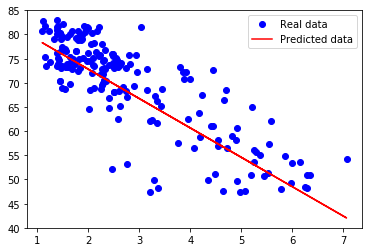

In [16]:
plt.plot(data[:,0], data[:,1],'bo', label = 'Real data')
plt.plot(data[:,0], data[:,0]*w + b, 'r', label = 'Predicted data')
plt.legend()
plt.show()

In [17]:
def huber_loss(predictions, labels, delta = 14.0):
    diff = tf.abs(predictions-labels)
    tf.cond(diff < delta, lambda: 0.5*tf.square(diff), lambda: delta*diff - 0.5*tf.square(delta))

In [40]:
dataset = tf.data.Dataset.from_tensor_slices((data[:,0],data[:,1]))
dataset = dataset.shuffle(100)

In [41]:
iterator = dataset.make_one_shot_iterator()
X,Y = iterator.get_next()

In [42]:
with tf.Session() as sess:
    print(sess.run([X,Y]))
    print(sess.run([X,Y]))
    print(sess.run([X,Y]))

[3.142, 68.484314]
[2.2893, 69.88439]
[1.475, 68.90371]
